# Fortnite Player stats

First analysis of the dataset to better understanding it and identity of any cleaning is needed.

In [3]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

data = pd.read_csv('datasets/Fortnite_players_stats.csv')
## look at the data
data.head()

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389,4702684,5584,...,75787.0,117967.0,101589.0,170.0,118.0,5.78,26.8,634.0,2682.0,2865.0
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732,4065613,4141,...,117327.0,150439.0,151358.0,229.0,190.0,8.20,18.2,1259.0,8442.0,4206.0
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171,1137279,1390,...,76065.0,86684.0,452136.0,1180.0,818.0,11.12,32.9,3583.0,26726.0,12273.0
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453,5326457,2249,...,6892.0,80016.0,1748407.0,190.0,246.0,2.33,5.4,3539.0,7787.0,33224.0
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245,3692623,5743,...,46068.0,81424.0,556721.0,824.0,600.0,14.99,53.3,1546.0,10826.0,12019.0


In [5]:
data.describe()

,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,Duos kd,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
count,1.435000e+03,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1.435000e+03,1435.000000,1435.000000,...,1434.000000,1434.000000,1.434000e+03,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,1.088202e+06,328.909408,1.816300,4.853937,6911.060627,11781.843206,43517.135889,1.397810e+06,836.602787,2.483686,...,11401.596932,40738.556485,2.902681e+05,74.070432,79.933752,3.885481,6.854463,1198.041144,4001.190377,8503.480474
std,8.872639e+05,529.192568,1.156026,5.330249,5408.219523,11417.340071,36314.877771,9.805693e+05,727.366968,1.596461,...,8379.376319,19507.459127,3.565171e+05,98.823116,106.559344,2.215753,6.042537,1095.757652,4296.714124,9849.725206
min,4.453000e+03,0.000000,0.080000,0.000000,30.000000,28.000000,210.000000,3.760000e+02,0.000000,0.000000,...,0.000000,74.000000,2.210000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000
25%,4.355170e+05,65.500000,1.050000,1.600000,2875.000000,3861.000000,16922.000000,5.863575e+05,321.000000,1.395000,...,5702.750000,29046.000000,7.857025e+04,20.000000,23.000000,2.350000,3.000000,455.500000,1374.250000,2421.250000
50%,9.070010e+05,162.000000,1.480000,2.900000,5728.000000,8452.000000,35762.000000,1.185518e+06,685.000000,2.090000,...,9717.000000,39392.000000,1.674590e+05,46.000000,48.000000,3.440000,5.300000,856.000000,2666.000000,5193.500000
75%,1.506555e+06,366.000000,2.200000,6.100000,9585.000000,15993.000000,59471.000000,1.994718e+06,1103.500000,3.050000,...,15076.250000,51403.250000,3.659395e+05,91.000000,91.000000,4.840000,8.900000,1572.250000,4986.000000,11155.250000
max,6.772116e+06,6480.000000,9.600000,44.100000,36487.000000,89023.000000,283835.000000,6.438735e+06,7594.000000,14.000000,...,117327.000000,150439.000000,3.900561e+06,1428.000000,1649.000000,16.590000,63.900000,8079.000000,39231.000000,120381.000000


In [7]:
data.isnull().sum()
# Checking for null values in the dataset, found most of them on Trios info so if used needs to be carefull

Player                   0
Solo score               0
Solo top1                0
Solo kd                  0
Solo winRatio            0
Solo matches             0
Solo kills               0
Solo minutesPlayed       0
Duos score               0
Duos top1                0
Duos kd                  0
Duos winRatio            0
Duos matches             0
Duos kills               0
Duos minutesPlayed       0
Trios score             24
Trios top1              24
Trios kd                24
Trios winRatio          24
Trios matches           24
Trios kills             24
Trios minutesPlayed     24
Squads score             1
Squads top1              1
Squads kd                1
Squads winRatio          1
Squads matches           1
Squads kills             1
Squads minutesPlayed     1
LTM score                1
LTM top1                 1
LTM top3                 1
LTM kd                   1
LTM winRatio             1
LTM matches              1
LTM kills                1
LTM minutesPlayed        1
d

In [8]:
data.shape
# Appropriately sized dataset, where a 80-20 split between train and test should be feasible.

(1435, 37)

In [12]:
data.corr()
# Searching for correlation between the variables, and looks like most of them are justifiable. 
# For example, the total time played on a match 'Solo minutesPlayed' have high correlation to 'Solo score' 
# and that makes sense as the more time you play more score you get
# No 100% correlation between variables, therefore no variable needs removal.

,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,Duos kd,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
Solo score,1.000000,0.598385,0.203172,0.245719,0.860244,0.715041,0.979049,-0.619354,-0.465329,-0.015511,...,0.007041,-0.126410,-0.079918,-0.062504,-0.124755,-0.052951,-0.085736,-0.047836,-0.037097,-0.070443
Solo top1,0.598385,1.000000,0.659677,0.768525,0.361533,0.748277,0.484908,-0.327641,-0.050454,0.401082,...,0.319172,-0.029263,-0.094367,0.219514,0.087436,0.260458,0.337669,-0.041475,0.087877,-0.092180
Solo kd,0.203172,0.659677,1.000000,0.854501,0.036813,0.613477,0.067514,-0.229486,0.211058,0.787322,...,0.597870,0.074924,-0.223037,0.281353,0.122975,0.506712,0.620643,-0.194246,0.044866,-0.230948
Solo winRatio,0.245719,0.768525,0.854501,1.000000,-0.022918,0.448650,0.133830,-0.152333,0.240078,0.637983,...,0.399540,0.034607,-0.092599,0.338486,0.200050,0.432852,0.562262,-0.092229,0.109766,-0.091980
Solo matches,0.860244,0.361533,0.036813,-0.022918,1.000000,0.705988,0.859965,-0.592394,-0.479228,-0.123383,...,0.038475,-0.073181,-0.106753,-0.108805,-0.149151,-0.168812,-0.174250,0.012041,-0.063815,-0.090001
Solo kills,0.715041,0.748277,0.613477,0.448650,0.705988,1.000000,0.601728,-0.528486,-0.235026,0.366227,...,0.416145,0.006813,-0.209449,0.095623,-0.038549,0.181546,0.236085,-0.099452,-0.000981,-0.207911
Solo minutesPlayed,0.979049,0.484908,0.067514,0.133830,0.859965,0.601728,1.000000,-0.601197,-0.488202,-0.114232,...,-0.077900,-0.144841,-0.057834,-0.105764,-0.145774,-0.125868,-0.154913,-0.036802,-0.062428,-0.046971
Duos score,-0.619354,-0.327641,-0.229486,-0.152333,-0.592394,-0.528486,-0.601197,1.000000,0.719371,-0.024728,...,-0.265977,-0.287861,0.221233,0.128760,0.203685,0.021936,0.042772,0.144203,0.135250,0.207252
Duos top1,-0.465329,-0.050454,0.211058,0.240078,-0.479228,-0.235026,-0.488202,0.719371,1.000000,0.461366,...,0.097180,-0.148050,0.055117,0.356248,0.342619,0.284666,0.474382,0.014254,0.146976,0.047470
Duos kd,-0.015511,0.401082,0.787322,0.637983,-0.123383,0.366227,-0.114232,-0.024728,0.461366,1.000000,...,0.546013,0.055363,-0.212164,0.253454,0.121463,0.566321,0.644355,-0.222178,0.049248,-0.219770


## Visualizations

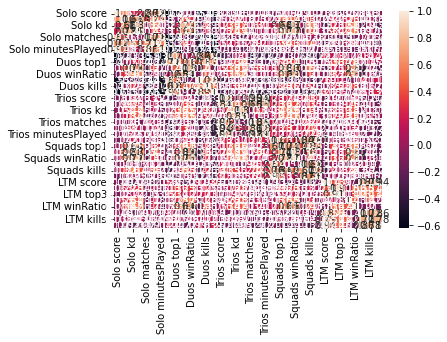

In [33]:
# Correlation Matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

#the same explanation as above

array([[<AxesSubplot:title={'center':'Solo score'}>,
        <AxesSubplot:title={'center':'Solo top1'}>,
        <AxesSubplot:title={'center':'Solo kd'}>,
        <AxesSubplot:title={'center':'Solo winRatio'}>,
        <AxesSubplot:title={'center':'Solo matches'}>,
        <AxesSubplot:title={'center':'Solo kills'}>],
       [<AxesSubplot:title={'center':'Solo minutesPlayed'}>,
        <AxesSubplot:title={'center':'Duos score'}>,
        <AxesSubplot:title={'center':'Duos top1'}>,
        <AxesSubplot:title={'center':'Duos kd'}>,
        <AxesSubplot:title={'center':'Duos winRatio'}>,
        <AxesSubplot:title={'center':'Duos matches'}>],
       [<AxesSubplot:title={'center':'Duos kills'}>,
        <AxesSubplot:title={'center':'Duos minutesPlayed'}>,
        <AxesSubplot:title={'center':'Trios score'}>,
        <AxesSubplot:title={'center':'Trios top1'}>,
        <AxesSubplot:title={'center':'Trios kd'}>,
        <AxesSubplot:title={'center':'Trios winRatio'}>],
       [<AxesSubplot:t

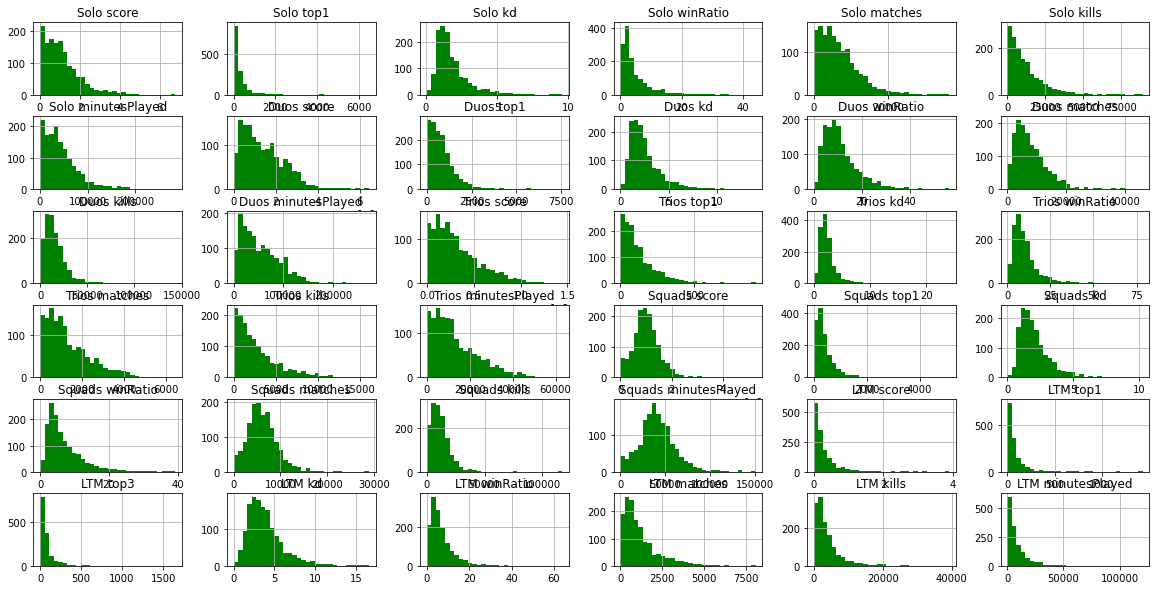

In [35]:
# Histogram Plotting (Data Distribution), this will help to understand the data per column
data.hist(bins = 30, figsize = (20,10), color = 'g')

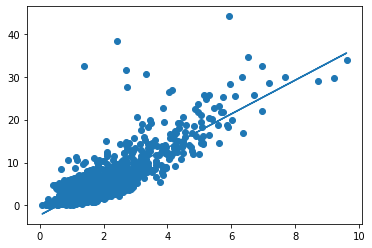

In [25]:
# Scipy’s Linear Regression
# Undertanding if there are predictin errors
from scipy import stats
import matplotlib.pyplot as plt

xi = data['Solo kd']
yi = data['Solo winRatio']
slope, intercept, r, p, std_err = stats.linregress(xi, yi)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, xi))
plt.scatter(xi, yi)
plt.plot(xi, mymodel)
plt.show()

In [26]:
import statsmodels.api as sm

X = data[['Solo kd']]
y = data['Solo winRatio']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Solo winRatio   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     3878.
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        07:40:35   Log-Likelihood:                -3497.1
No. Observations:                1435   AIC:                             6998.
Df Residuals:                    1433   BIC:                             7009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3022      0.136    -16.902      0.0

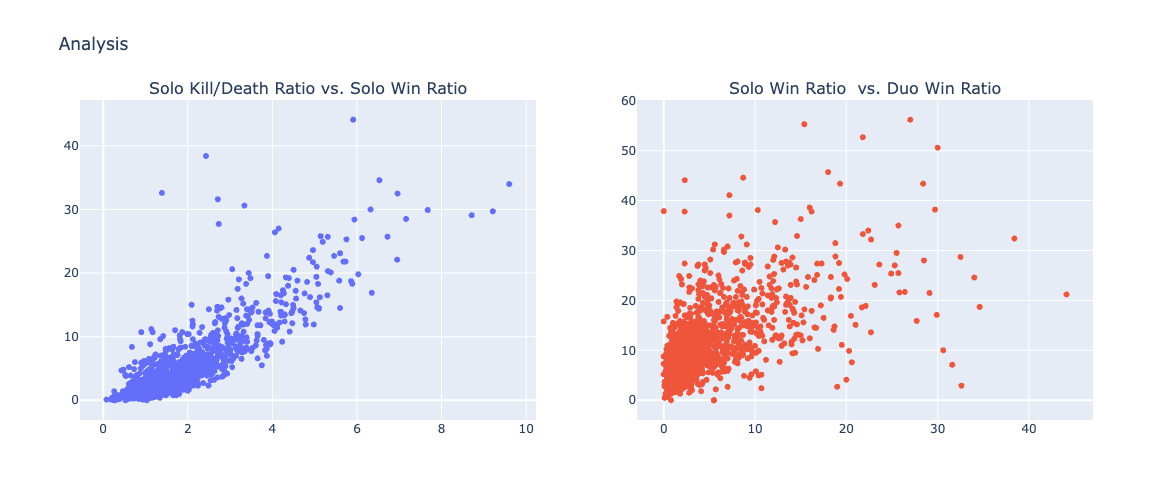

In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1,cols=2, subplot_titles=('Solo Kill/Death Ratio vs. Solo Win Ratio','Solo Win Ratio  vs. Duo Win Ratio'))

fig.add_trace(go.Scatter(x=data['Solo kd'],y=data['Solo winRatio'], mode='markers', showlegend=False), row=1,col=1)
fig.add_trace(go.Scatter(x=data['Solo winRatio'],y=data['Duos winRatio'], mode='markers', showlegend=False), row=1,col=2)
fig.update_layout(title='Analysis', height=500)
fig.show()

In [27]:
#Analysing imbalance 
targetKd = data['Solo kd'].value_counts()
print(targetKd)
print("Solo kd represents:",(len(targetKd)/len(data))*100, "% of the dataset.")

targetWinRatio = data['Solo winRatio'].value_counts()
#print(targetWinratio)
print("Solo win ratio represents:",(len(targetWinRatio)/len(data))*100, "% of the dataset.")

1.03    14
1.24    14
0.91    14
1.15    13
1.04    13
        ..
0.57     1
2.32     1
4.03     1
5.08     1
3.42     1
Name: Solo kd, Length: 390, dtype: int64
Solo kd represents: 27.177700348432055 % of the dataset.
Solo win ratio represents: 14.285714285714285 % of the dataset.


In [4]:
from sklearn import linear_model
## based on solo win ratio predict duo win ratio
soloWinRatioX = data[['Solo winRatio']]
duoWinRatioY = data['Duos winRatio']

regr = linear_model.LinearRegression()
regr.fit(soloWinRatioX, duoWinRatioY)
# The model's regression coefficients
print(regr.coef_)

[0.83461503]


In [5]:
predicted = regr.predict([[20]])
print(predicted)

[23.82635807]


/Users/jeisse.rocha/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
#for regression metrics, use variance explanation for absolute and squered error
X_train, X_test, y_train, y_test = train_test_split(soloWinRatioX, duoWinRatioY, test_size=0.33, random_state=42)
# initialize and fit to your train data and predict on test data

regr.fit(X_train, y_train)
preds = regr.predict(X_test)
# evaluate
mean_absolute_error(y_test, preds) == np.mean(np.abs(y_test - preds))
# get the variance of (absolute) residuals
np.var(np.abs(y_test - preds))
resultQ1a = np.var((y_test - preds))
print('mean_absolute_error:', resultQ1a)

resultQ1s = mean_squared_error(soloWinRatioX, duoWinRatioY, squared=False)

print('mean_squared_error:', resultQ1s)

mean_absolute_error: 32.93554416813547
mean_squared_error: 8.718309461164313


In [7]:
## based on number of Solo kills predict Solo winRatio
# The more you kill enemies, more often you gonna win?
soloKillsX = data[['Solo kd']]
soloWinRatioY = data['Solo winRatio']

regr = linear_model.LinearRegression()
regr.fit(soloKillsX, soloWinRatioY)
# The model's regression coefficients
print(regr.coef_)

[3.93996792]


In [8]:
# first matches you are mostly playing aganst easy bots so easy to kill, the more you play, more you face high level players
predicted = regr.predict([[4]])
print(predicted)

[13.45764659]


/Users/jeisse.rocha/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
#for regression metrics, use variance explanation for absolute and squered error
X_train, X_test, y_train, y_test = train_test_split(soloKillsX, soloWinRatioY, test_size=0.33, random_state=42)
# initialize and fit to your train data and predict on test data

regr.fit(X_train, y_train)
preds = regr.predict(X_test)
# evaluate
mean_absolute_error(y_test, preds) == np.mean(np.abs(y_test - preds))
# get the variance of (absolute) residuals
np.var(np.abs(y_test - preds))
resultQ2a = np.var((y_test - preds))
print('mean_absolute_error:', resultQ2a)

resultQ2s = mean_squared_error(soloKillsX, soloWinRatioY, squared=False)

print('mean_squared_error:', resultQ2s)

mean_absolute_error: 6.735083039613258
mean_squared_error: 5.332080615799033
